In [1]:
from model import FraudModel, SavedModel

Decision Tree: Accuracy on training Data: 0.997
Decision Tree: Accuracy on test Data: 0.998


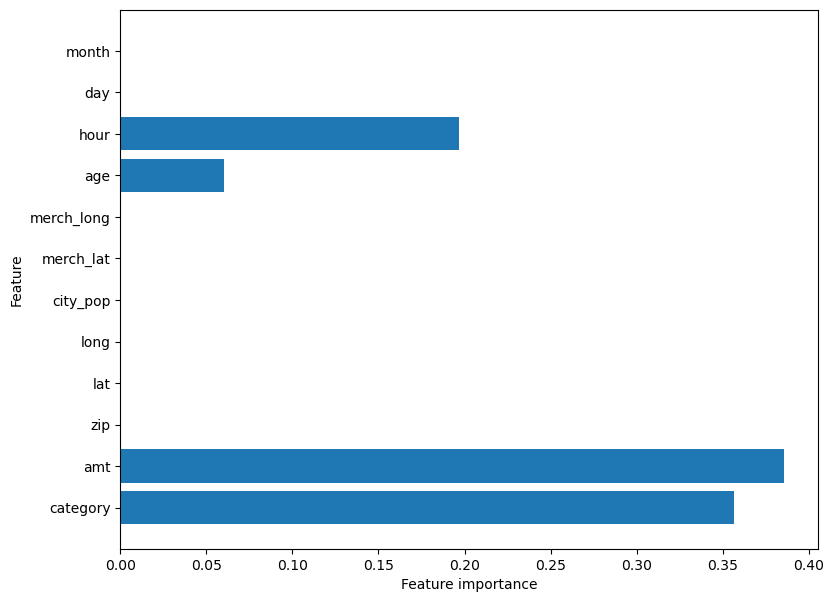

Random forest: Accuracy on training Data: 0.995
Random forest: Accuracy on test Data: 0.997


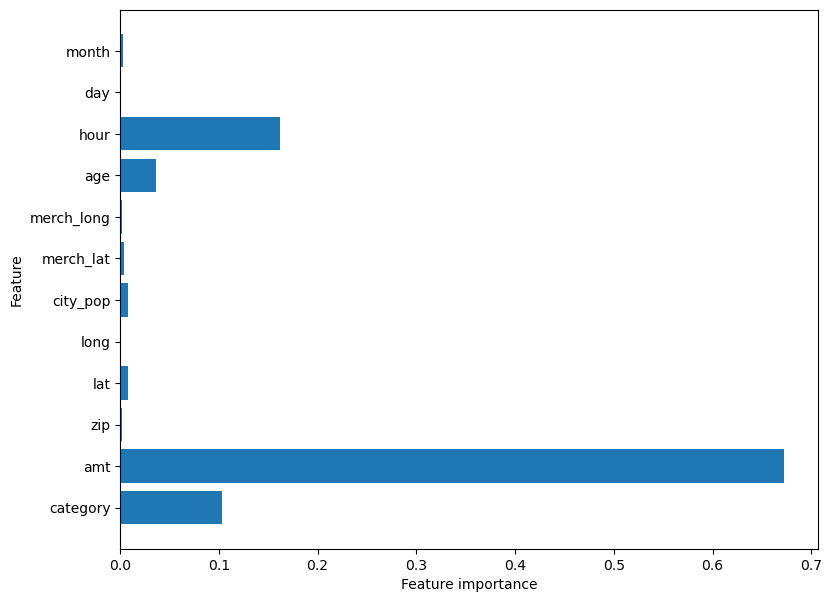

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 0.999


In [2]:
fModel = FraudModel(
    train_file_path="../../fraudTrain.csv",
    test_file_path="../../fraudTest.csv",
)

In [3]:
fModel.compare_models()

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.997,0.998
1,Random Forest,0.995,0.997
2,XGBoost,1.000,0.999


In [4]:
fModel.test_original.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,54,12,6,6
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,32,12,6,6
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,52,12,6,6
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,35,12,6,6
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,67,12,6,6


In [5]:
model = fModel.Models[0]

In [18]:
# Sample no_fraud
columns = ['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month']

# Convert category into numerical feature
test_data = fModel.test_original.copy()
test_data['category'] = fModel.label_encoder.fit_transform(test_data['category'])

sample_no_fraud = test_data[test_data['is_fraud'] == 0][columns].head(10)
sample_fraud = test_data[test_data['is_fraud'] == 1][columns].head(10)


In [19]:
test_data[test_data['is_fraud'] == 1][['amt', 'category', 'is_fraud']]

,amt,category,is_fraud
1685,24.84,5,1
1767,780.52,8,1
1781,620.33,0,1
1784,1077.69,11,1
1857,842.65,12,1
...,...,...,...
517197,1041.51,12,1
517274,868.09,12,1
517341,1039.42,11,1
517529,289.27,4,1


In [20]:
# Test DTree

In [21]:
fModel.clf_predict(model, sample_fraud)

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [22]:
fModel.clf_predict(model, sample_no_fraud)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Test RForest

In [24]:
fModel.clf_predict(fModel.Models[1], sample_fraud)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [30]:
fModel.clf_predict(fModel.Models[1], sample_no_fraud)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
# Test XGB

In [32]:
fModel.clf_predict(fModel.Models[2], sample_fraud)

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [16]:
fModel.label_encoder.classes_

array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'], dtype=object)

In [17]:
fModel.X_train.category.nunique()

14